In [1]:
import traitlets
import ipywidgets

In [2]:
class Band(traitlets.HasTraits):
    name = traitlets.Unicode()
    age = traitlets.Int()

In [3]:
weezer = Band(name = "Weezer", age = 26)

In [4]:
weezer.name

'Weezer'

In [5]:
weezer.age

26

In [6]:
weezer.name

'Weezer'

In [7]:
def name_changed(change):
    print("Band name has changed from {} to {}".format(
        change['old'], change['new']))

In [8]:
weezer.observe(name_changed, ['name'])

In [9]:
weezer.name

'Weezer'

In [10]:
weezer.name = "White Stripes"

Band name has changed from Weezer to White Stripes


In [11]:
weezer.unobserve_all()

In [12]:
def trait_changed(change):
    print("The trait {name} has changed from {old} to {new}".format(
        **change))

In [13]:
weezer = Band(name = "Weezer", age = 26)
weezer.observe(trait_changed, ['name', 'age'])

In [14]:
weezer.age = 10

The trait age has changed from 26 to 10


In [15]:
weezer.name = "Something Else"

The trait name has changed from Weezer to Something Else


In [16]:
weezer.name = "Something Else"

In [17]:
class Record(traitlets.HasTraits):
    band_name = traitlets.Unicode()

In [18]:
some_record = Record(band_name = "")

In [19]:
traitlets.link( (weezer, 'name'), (some_record, 'band_name') )

In [20]:
some_record.band_name

'Something Else'

In [21]:
weezer.name = "Weezer"

The trait name has changed from Something Else to Weezer


In [22]:
some_record.band_name

'Weezer'

In [23]:
some_record.band_name = "TMBG"

The trait name has changed from Weezer to TMBG


In [24]:
@ipywidgets.interact(name = ['Weezer', 'Nerf Herder', 'Mustard Plug'],
                    age = (0, 100, 5),
                    message = "hi")
def print_bandname(name = "Mustard Plug", age = 10, message = "hi"):
    print(name, age, message)

interactive(children=(Dropdown(description='name', index=2, options=('Weezer', 'Nerf Herder', 'Mustard Plug'),…

In [25]:
fs = ipywidgets.FloatSlider()

In [26]:
display(fs)

FloatSlider(value=0.0)

In [27]:
fs.max = 50

In [28]:
fs.min = 10.

In [29]:
display(fs)

FloatSlider(value=10.0, max=50.0, min=10.0)

In [30]:
fs.value

10.0

In [31]:
def print_value(change):
    print("Trait changed from {old} to {new}".format(**change))
fs.observe(print_value, ['value'])

In [32]:
fs.unobserve_all()

In [33]:
ipywidgets.IntRangeSlider()

IntRangeSlider(value=(25, 75))

In [34]:
log_slider = ipywidgets.FloatLogSlider()

In [35]:
display(log_slider)

FloatLogSlider(value=1.0)

In [36]:
log_slider.value = 1e3

In [37]:
pbar = ipywidgets.FloatProgress()

In [38]:
display(pbar)

FloatProgress(value=0.0)

In [39]:
import time

In [40]:
for i in range(100):
    pbar.value = i
    time.sleep(0.1)

In [41]:
bft = ipywidgets.BoundedFloatText(min = 25.0, max = 53.0, value = 25.1)

In [42]:
bft

BoundedFloatText(value=25.1, max=53.0, min=25.0)

In [43]:
traitlets.link((bft, 'value'), (log_slider, 'value'))

In [44]:
my_display = ipywidgets.HTML()

In [45]:
my_display

HTML(value='')

In [46]:
my_display.value = "hi there <b>this is bold</b>"

In [47]:
text_entry = ipywidgets.Textarea()
text_display = ipywidgets.HTML()

traitlets.link( (text_entry, "value"), (text_display, "value") )

In [48]:
display(text_entry)

Textarea(value='')

In [49]:
display(text_display)

HTML(value='')

In [50]:
ipywidgets.HBox([text_entry, text_display])

In [51]:
ipywidgets.VBox([text_entry, text_display])

In [52]:
ipywidgets.HBox([
    ipywidgets.VBox([text_entry, text_display]),
    ipywidgets.IntSlider()
])

In [53]:
slider = ipywidgets.SelectionSlider(options = ["Weezer", "Nerf Herder", "Mustard Plug"])

In [54]:
slider

SelectionSlider(options=('Weezer', 'Nerf Herder', 'Mustard Plug'), value='Weezer')

In [55]:
slider.index

0

In [56]:
slider.value

'Weezer'

In [57]:
rb = ipywidgets.RadioButtons(options = ["This", "That", "The Other"])
display(rb)

RadioButtons(options=('This', 'That', 'The Other'), value='This')

In [58]:
rb.index

0

In [59]:
rb.value

'This'

In [60]:
ipywidgets.Checkbox(description="Enabled")

Checkbox(value=False, description='Enabled')

In [61]:
@ipywidgets.interact(message = ipywidgets.Textarea())
def print_message(message):
    print(message)

interactive(children=(Textarea(value='', description='message'), Output()), _dom_classes=('widget-interact',))

In [62]:
button = ipywidgets.Button(description = "Does Something")
display(button)

Button(description='Does Something', style=ButtonStyle())

In [63]:
def button_clicked(obj):
    print(obj)
button.on_click(button_clicked)

In [64]:
class SomeRandomValue(traitlets.HasTraits):
    value1 = traitlets.Float()
    value2 = traitlets.Float()
srv = SomeRandomValue()

In [65]:
button1 = ipywidgets.Button(description = "Change value1")
button2 = ipywidgets.Button(description = "Change value2")

In [66]:
value1_floatslider = ipywidgets.FloatSlider()
value2_floatslider = ipywidgets.FloatSlider()

In [67]:
ipywidgets.HBox([
    ipywidgets.VBox([button1, button2]),
    ipywidgets.VBox([value1_floatslider, value2_floatslider])
])

In [68]:
import random

In [69]:
def change_value1(button):
    srv.value1 = random.randrange(0.0, 100.0)
def change_value2(button):
    srv.value2 = random.randrange(0.0, 100.0)

In [70]:
srv.value1, srv.value2

(0.0, 0.0)

In [71]:
button1.on_click(change_value1)
button2.on_click(change_value2)

In [72]:
srv.value1

0.0

In [73]:
srv.value2

0.0

In [74]:
traitlets.link( (value1_floatslider, 'value'), (srv, 'value1') )
traitlets.link( (value2_floatslider, 'value'), (srv, 'value2') )

In [75]:
ipywidgets.ColorPicker()

ColorPicker(value='black')

In [76]:
ipywidgets.Controller()

Controller()

In [77]:
ipywidgets.Video()

Video(value=b'')

In [78]:
ipywidgets.Play()

Play(value=0)

In [79]:
%matplotlib inline

In [80]:
import matplotlib.pyplot as plt

In [81]:
import numpy as np

In [82]:
x = np.random.random(size = 10000)
y = np.random.normal(size = 10000)

In [83]:
@ipywidgets.interact(n = (10, 1000))
def make_plot(n = 100):
    plt.scatter(x[:n], y[:n])

interactive(children=(IntSlider(value=100, description='n', max=1000, min=10), Output()), _dom_classes=('widge…

In [84]:
import h5py
f = h5py.File("single_dicom.h5", mode = "r")
scan = f["scan"][:]

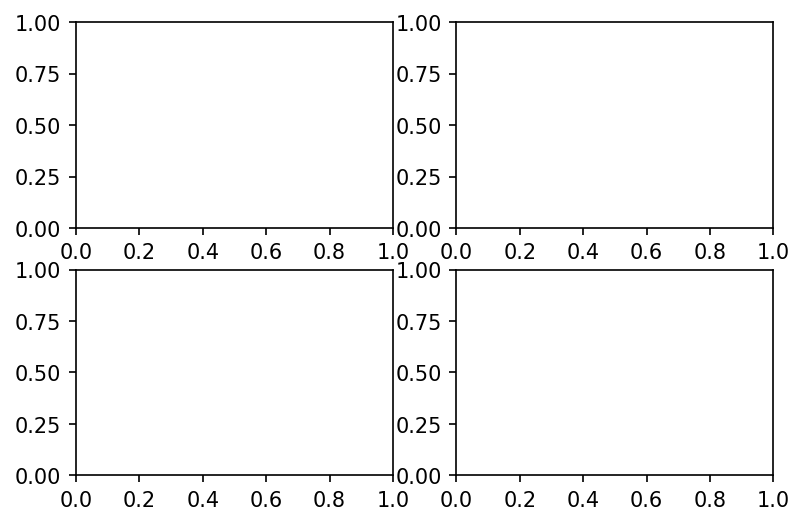

interactive(children=(IntSlider(value=18, description='x_ind', max=36), IntSlider(value=256, description='y_in…

In [85]:
fig, ax = plt.subplots(2,2, dpi = 150)

@ipywidgets.interact( x_ind = (0, scan.shape[0]),
                      y_ind = (0, scan.shape[1]),
                      z_ind = (0, scan.shape[2]))
def sliceit(x_ind = 18, y_ind = 256, z_ind = 256):
    ax[0,0].imshow(scan[x_ind,:,:], extent = [0.0, 1.0, 0.0, 1.0])
    ax[1,0].imshow(scan[:,y_ind,:], extent = [0.0, 1.0, 0.0, 1.0])
    ax[0,1].imshow(scan[:,:,z_ind], extent = [0.0, 1.0, 0.0, 1.0])
    ax[1,1].clear()
    return fig